In [1]:
import pandas,numpy,seaborn

import scipy,scipy.stats

import matplotlib,matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40,'font.family':'Arial','xtick.labelsize':20,'ytick.labelsize':20,'axes.labelsize':33})
matplotlib.rcParams['pdf.fonttype']=42

# 0. user defined variables

In [2]:
data_file='/Volumes/omics4tb2/alomana/projects/TLR/data/yeast_mar_alba/Blevins_Tavella_gene_lists.xlsx'

# 1. read data

In [3]:
df=pandas.read_excel(data_file,skiprows=1)
print(df.shape)
df.head()

(6025, 15)


,ID,RNA_normal_rep1,RNA_normal_rep2,RNA_stress_rep1,RNA_stress_rep2,RP_normal_rep1,RP_normal_rep2,RP_stress_rep1,RP_stress_rep2,Proteomics_normal_rep1,Proteomics_normal_rep2,Proteomics_normal_rep3,Proteomics_stress_rep1,Proteomics_stress_rep2,Proteomics_stress_rep3
0,PAU8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YAL067W-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEO1,6.981315,5.920839,4.436726,2.025004,0.551814,0.697199,0.818438,0.352818,NaN,NaN,NaN,NaN,NaN,NaN
3,YAL065C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YAL064W-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2. manipulate data

In [4]:
df=df.iloc[:,:9]
print(df.shape)
df.head()

(6025, 9)


,ID,RNA_normal_rep1,RNA_normal_rep2,RNA_stress_rep1,RNA_stress_rep2,RP_normal_rep1,RP_normal_rep2,RP_stress_rep1,RP_stress_rep2
0,PAU8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YAL067W-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SEO1,6.981315,5.920839,4.436726,2.025004,0.551814,0.697199,0.818438,0.352818
3,YAL065C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YAL064W-B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(axis=0,inplace=True,how='any')
print(df.shape)
df.head()

(5312, 9)


,ID,RNA_normal_rep1,RNA_normal_rep2,RNA_stress_rep1,RNA_stress_rep2,RP_normal_rep1,RP_normal_rep2,RP_stress_rep1,RP_stress_rep2
2,SEO1,6.981315,5.920839,4.436726,2.025004,0.551814,0.697199,0.818438,0.352818
9,GDH3,20.193265,15.163124,20.509393,19.400848,4.855962,4.677045,2.896010,3.335729
10,BDH2,222.200986,240.949258,169.934971,195.772196,97.726232,104.841331,93.868513,106.807486
11,BDH1,151.411956,118.994419,180.650082,185.124592,125.868738,119.482514,121.569483,118.642910
12,ECM1,106.971759,112.062705,94.092073,95.240528,46.435135,51.273192,39.222055,38.713704


In [6]:
df['transcript.control.average']=df.loc[:,['RNA_normal_rep1','RNA_normal_rep2']].mean(axis=1)
df['transcript.treatment.average']=df.loc[:,['RNA_stress_rep1','RNA_stress_rep2']].mean(axis=1)
df['footprint.control.average']=df.loc[:,['RP_normal_rep1','RP_normal_rep2']].mean(axis=1)
df['footprint.treatment.average']=df.loc[:,['RP_stress_rep1','RP_stress_rep2']].mean(axis=1)
print(df.shape)
df.head()

(5312, 13)


,ID,RNA_normal_rep1,RNA_normal_rep2,RNA_stress_rep1,RNA_stress_rep2,RP_normal_rep1,RP_normal_rep2,RP_stress_rep1,RP_stress_rep2,transcript.control.average,transcript.treatment.average,footprint.control.average,footprint.treatment.average
2,SEO1,6.981315,5.920839,4.436726,2.025004,0.551814,0.697199,0.818438,0.352818,6.451077,3.230865,0.624507,0.585628
9,GDH3,20.193265,15.163124,20.509393,19.400848,4.855962,4.677045,2.896010,3.335729,17.678195,19.955120,4.766503,3.115870
10,BDH2,222.200986,240.949258,169.934971,195.772196,97.726232,104.841331,93.868513,106.807486,231.575122,182.853584,101.283782,100.337999
11,BDH1,151.411956,118.994419,180.650082,185.124592,125.868738,119.482514,121.569483,118.642910,135.203188,182.887337,122.675626,120.106197
12,ECM1,106.971759,112.062705,94.092073,95.240528,46.435135,51.273192,39.222055,38.713704,109.517232,94.666301,48.854163,38.967879


In [7]:
# reproduce results

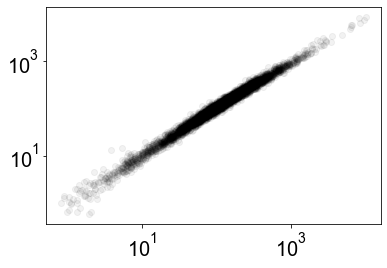

In [8]:
matplotlib.pyplot.loglog(df['RNA_normal_rep1'],df['RNA_normal_rep2'],'o',color='black',alpha=0.05)

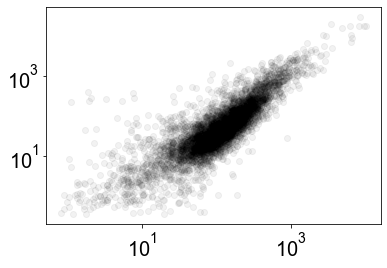

In [9]:
matplotlib.pyplot.loglog(df['RNA_normal_rep1'],df['RP_normal_rep2'],'o',color='black',alpha=0.05)

# 3. biological analysis

In [10]:
df['transcript.control.log10CPM']=numpy.log10(df['transcript.control.average'])
a=df['footprint.control.average']
b=df['transcript.control.average']
ratio=a/b
df['TE.log2.control']=numpy.log2(ratio)

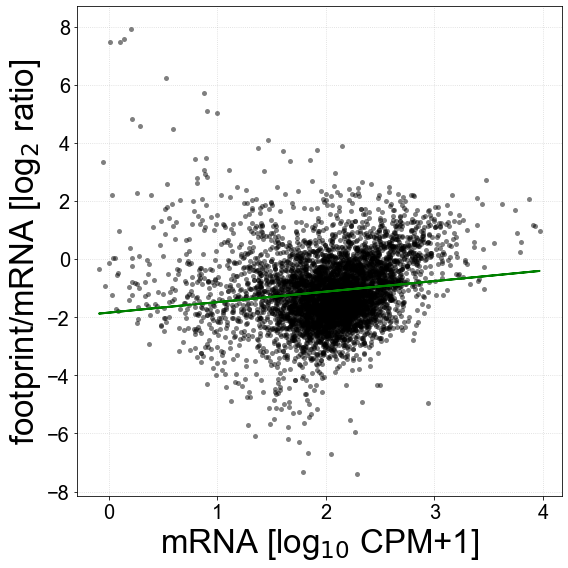

In [11]:
x=numpy.array(df['transcript.control.log10CPM'])
y=numpy.array(df['TE.log2.control'])

matplotlib.pyplot.figure(None,(8,8))

matplotlib.pyplot.plot(x,y,'o',color='black',alpha=0.5,ms=5,mew=0)

# compute for the model
slope,intercept,r_value,p_value,std_err=scipy.stats.linregress(x,y)
m=slope
c=intercept
expected=list(m*numpy.array(x)+c)
matplotlib.pyplot.plot(x,expected,'-',lw=2,color='green')

matplotlib.pyplot.xlabel('mRNA [log$_{10}$ CPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

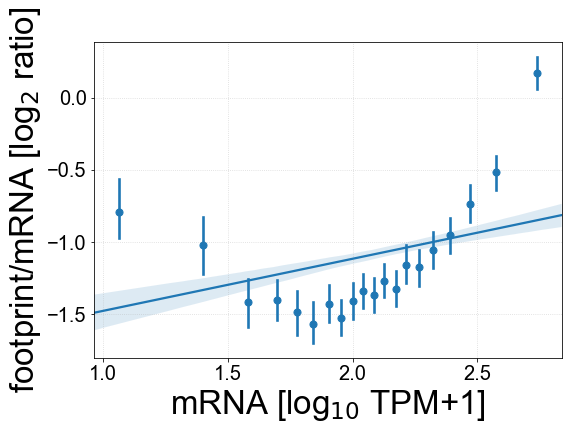

In [12]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=x,y=y,x_bins=20)

#matplotlib.pyplot.xlim([0,3])
matplotlib.pyplot.xlabel('mRNA [log$_{10}$ CPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

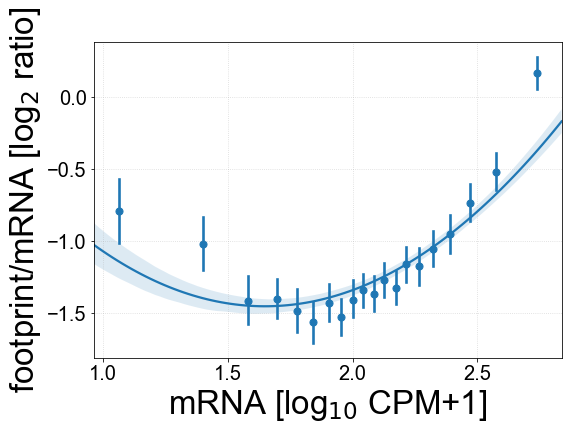

In [13]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=x,y=y,x_bins=20,order=2)

#matplotlib.pyplot.xlim([0,3])
matplotlib.pyplot.xlabel('mRNA [log$_{10}$ CPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()

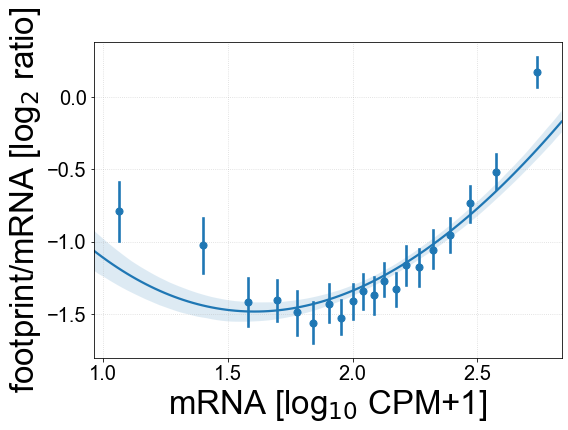

In [14]:
matplotlib.pyplot.figure(None,(8,6))

seaborn.regplot(x=x,y=y,x_bins=20,order=3)

#matplotlib.pyplot.xlim([0,3])
matplotlib.pyplot.xlabel('mRNA [log$_{10}$ CPM+1]')
matplotlib.pyplot.ylabel('footprint/mRNA [log$_{2}$ ratio]')

matplotlib.pyplot.grid(True,alpha=0.5,ls=':')
matplotlib.pyplot.tight_layout()